In [2]:
from rdflib import Graph, Literal, RDF,RDFS, URIRef, Namespace #basic RDF handling
from rdflib.namespace import FOAF , XSD #most common namespaces


import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

In [3]:
# function to visualize the graph
def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()
    display(Image(png))

In [4]:
# Defining the common Namespace 
uri = Namespace('http://exampleDb.org/')

In [5]:
# tbox

#class
Paper = uri['Paper']

#subclasses of paper
poster = uri['poster']
shortPaper = uri['shortPaper']
fullPaper = uri['fullPaper']
demoPaper = uri['demoPaper']

#classes
Publication = uri['Publication']
review = uri['review']

#class
Person = uri['Person']

#subclasses of person
reviewer = uri['reviewer']
chair = uri['chair']
editor = uri['editor']
author = uri['author']

#class 
area = uri['area']

#subclasses of area
ml = uri['ml']
db = uri['db']
nlp = uri['nlp']

#class 
venue = uri['venue']

#subclasses of venue
journal = uri['journal']
conference = uri['conference']

##subclasses of conference
workshops = uri['workshops']
symposiums = uri['symposiums']
expertGrou = uri['expertGroups']
regularConferences = uri['regularConferences']

#properties 

#paper acceptedfor publication 
accepted = uri['acceptedfor']
#relatedArea
relatedto = uri['relatedto']
#paper submittedIn
submittedIn = uri['submittedIn']
#author wrote paper
wrote = uri['wrote']
#reviewer Submitted review
R_submitted = uri['submitted']
#review about paper
r_about = uri['reviewAbout']



###########
#venue name
vname = uri["venueName"]

# paper name
pname =  uri["paperName"]

# person name
person_name = uri["personName"]

# area name
a_name = uri["areaName"]

# publication name and year
pub_name = uri["publicationName"]
pub_year = uri["year"]

#review decision and comments
r_decision = uri["decision"]
r_comments = uri["comments"]

# chair handles 
chandles = uri["handledByC"]
# editor handles
ehandles = uri["handledByE"]

In [6]:
#initiating the graph
g = Graph()

In [7]:
#triplets 
#defining classes are RDF.type of RDFS.Class
#class
g.add((Paper,RDF.type, RDFS.Class))
g.add((Publication,RDF.type, RDFS.Class))
g.add((review,RDF.type, RDFS.Class))
g.add((Person,RDF.type, RDFS.Class))
g.add((area,RDF.type, RDFS.Class))
g.add((venue,RDF.type, RDFS.Class))

#subclasses 
g.add((poster, RDFS.subClassOf, Paper))
g.add((shortPaper, RDFS.subClassOf, Paper))
g.add((fullPaper, RDFS.subClassOf, Paper))
g.add((demoPaper, RDFS.subClassOf, Paper))

g.add((reviewer, RDFS.subClassOf, Person))
g.add((chair, RDFS.subClassOf, Person))
g.add((editor, RDFS.subClassOf, Person))
g.add((author, RDFS.subClassOf, Person))

g.add((ml, RDFS.subClassOf, area))
g.add((db, RDFS.subClassOf, area))
g.add((nlp, RDFS.subClassOf, area))

g.add((conference, RDFS.subClassOf, venue))
g.add((journal, RDFS.subClassOf, venue))

g.add((workshops, RDFS.subClassOf, conference))
g.add((symposiums, RDFS.subClassOf, conference))
g.add((expertGrou, RDFS.subClassOf, conference))
g.add((regularConferences, RDFS.subClassOf, conference))

# mentioning the type of properties

 
g.add((accepted,RDF.type, RDF.Property))  
# mentioning the domain and range of properties
g.add((accepted,RDFS.domain,Paper))
g.add((accepted,RDFS.range,Publication))
g.add((Paper,accepted,Publication))

g.add((relatedto,RDF.type, RDF.Property))
g.add((relatedto,RDFS.domain,Paper))
g.add((relatedto,RDFS.range,area))
g.add((Paper,relatedto,area))

g.add((submittedIn,RDF.type, RDF.Property))
g.add((submittedIn,RDFS.domain,Paper))
g.add((submittedIn,RDFS.range,venue))
g.add((Paper,submittedIn,venue))

g.add((wrote,RDF.type, RDF.Property))
g.add((wrote,RDFS.domain,author))
g.add((wrote,RDFS.range,Paper))
g.add((author,wrote,Paper))

g.add((R_submitted,RDF.type, RDF.Property))
g.add((R_submitted,RDFS.domain,reviewer))
g.add((R_submitted,RDFS.range,review))
g.add((reviewer,R_submitted,review))


g.add((r_about,RDF.type, RDF.Property))
g.add((r_about,RDFS.domain,review))
g.add((r_about,RDFS.range,Paper))
g.add((review,r_about,Paper))

#venue name

g.add((vname,RDF.type, RDF.Property))
g.add((vname,RDFS.domain,venue))

# paper name

g.add((pname,RDF.type, RDF.Property))
g.add((pname,RDFS.domain,Paper))

# person name

g.add((person_name,RDF.type, RDF.Property))
g.add((person_name,RDFS.domain,Person))

# area name

g.add((a_name,RDF.type, RDF.Property))
g.add((a_name,RDFS.domain,area))

# publication name and year

g.add((pub_name,RDF.type, RDF.Property))
g.add((pub_name,RDFS.domain,Publication))
g.add((pub_year,RDF.type, RDF.Property))
g.add((pub_year,RDFS.domain,Publication))

#review decision and comments

g.add((r_decision,RDF.type, RDF.Property))
g.add((r_decision,RDFS.domain,review))
g.add((r_comments,RDF.type, RDF.Property))
g.add((r_comments,RDFS.domain,review))

# chair handles conference paper and editor handles journal 

g.add((chandles,RDF.type, RDF.Property))
g.add((chandles,RDFS.domain,conference))
g.add((chandles,RDFS.range,chair))


g.add((ehandles,RDF.type, RDF.Property))
g.add((ehandles,RDFS.domain,journal))
g.add((ehandles,RDFS.range,editor))



<Graph identifier=N43c4dad8f5044de5a7bc9e2fc2fba859 (<class 'rdflib.graph.Graph'>)>


(dot.exe:18636): Pango-WARNING **: couldn't load font "DejaVu Sans Bold Not-Rotated 14", falling back to "Sans Bold Not-Rotated 14", expect ugly output.

(dot.exe:18636): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.



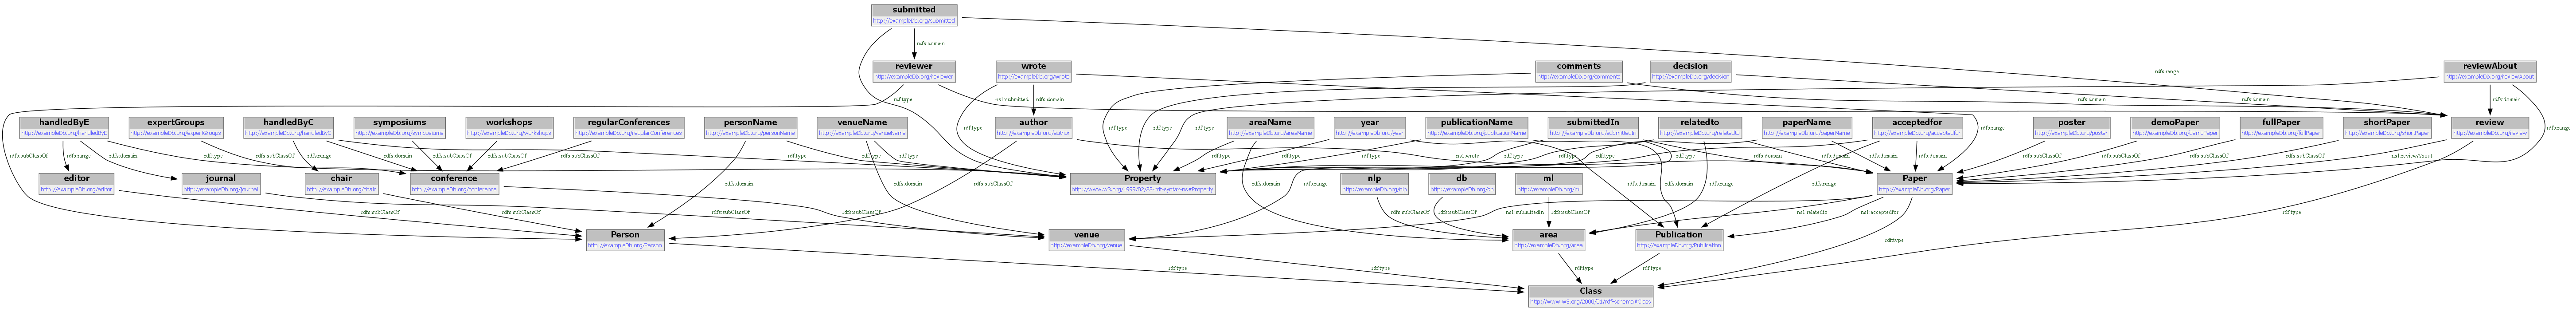

In [8]:
visualize(g)

In [9]:
# Save the results to disk
g.serialize('tbox-Seif_Amjid.ttl',format='turtle')

<Graph identifier=N43c4dad8f5044de5a7bc9e2fc2fba859 (<class 'rdflib.graph.Graph'>)>